In [1]:
%%capture
%pip install langchain langchain-openai langchain_experimental python-dotenv matplotlib numpy pandas langgraph

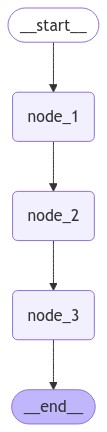

In [5]:
from langgraph.graph import START, END, StateGraph, MessagesState
from langchain_core.messages import HumanMessage
from IPython.display import Image, display

from typing_extensions import TypedDict

#
# LOS NODOS Y LAS KEYS DEL STATE NO DEBEN SER IGUALES PORQUE SINO FALLA EL GRAFO
# AL MOMENTO DE CREARLO
# 

class CustomState(MessagesState):
    node_01: str
    node_02: str
    node_03: str


def node_1(state):
    # cuando el nodo 1 termina, se actualiza el estado en la key node_01 con este
    # valor y continuamos el flujo
    return {"node_01": "ok", "messages" : [HumanMessage(content='node 1')] + state["messages"]}


def node_2(state):
    return {"node_02": "ok", "messages" : [HumanMessage(content='node 2')] + state["messages"]}


def node_3(state):
    return {"node_03": "ok", "messages" : [HumanMessage(content='node 3')] + state["messages"]}


builder = StateGraph(CustomState)

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", "node_3")
builder.add_edge("node_3", END)

graph = builder.compile()

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [7]:
initial_state: CustomState = {
    "node_01": "",
    "node_02": "",
    "node_03": ""
}

output = graph.invoke(
    input=initial_state
)

for m in output['messages']:
    m.pretty_print()

output_without_messages = {k: v for k, v in output.items() if k != 'messages'}
print(output_without_messages)

================================ Human Message =================================

node 1
================================ Human Message =================================

node 2
================================ Human Message =================================

node 3
{'node_01': 'ok', 'node_02': 'ok', 'node_03': 'ok'}
